<a href="https://colab.research.google.com/github/MauroTalamantes/Introducci-n_ProcesamientoImagenes_ScikitImage/blob/main/Introducci%C3%B3n_a_Procesamiento_de_im%C3%A1genes_y_scikit_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introducción al procesamiento de imágenes y scikit-image
Extración de datos, transformación y analisis de imágenes con NumPy y Scikit-image. Conversión de imágenes RGB a escala de grises, obtención de datos de ellas, histogramas con información muy útil y separación de objetos del fondo. Este es el resumen de la clase.

In [2]:
#Importamos librerias
import numpy as np
import matplotlib.pyplot as plt

## Imágenes con scikit-image
- Objetivo
  - Visualización: Objetos menos visibles
  - Nitidez y restauración de imágenes: Una mejor imagen
  - Recuperación de imágenes: Búsqueda de la imagen de interés
  - Medición de patrones: Mide varios objetos
  - Reconocimiento de imágenes: Distingue objetos en una imagen
- Scikit-Image
  - Fácil de usar
  - Utiliza el aprendizaje automático
  - Algoritmo complejo y listo para usar

In [15]:
#Función para visualizar imagenes
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

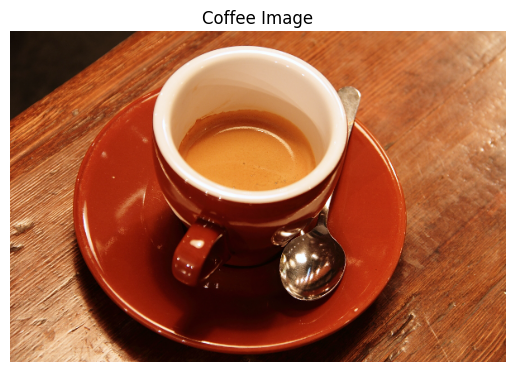

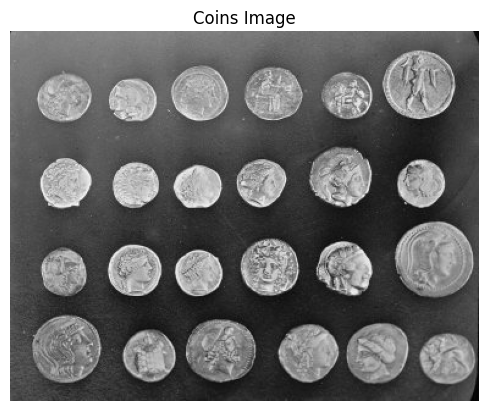

In [16]:
#Obtenemos y mostramos imagenes desde skimage
from skimage import data

coffee_image = data.coffee()
coins_image = data.coins()

show_image(coffee_image, 'Coffee Image')
show_image(coins_image, 'Coins Image')

Conocer las dimensiones de una imagen (.shape) es útil dependiendo de lo que queramos hacer con ella. Algunas razones por las que interesa saberlo son:
  - Si se está entrenando un modelo de Machine Learning (por ejemplo, una red neuronal), necesitamos que todas las imágenes tengan el mismo tamaño.
  ```
  from skimage.transform import resize
  imagen_escalda = resize(coffee_image, (256, 256))
  ```
  - Verificar el tipo de imagen, si es gris o a colores. Útil para decidir si se aplican filtros en todos los canales o solo uno.
    - Escala de grises → 2D (solo alto y ancho)
    - A color → 3D (alto, ancho, canales)

  ```
  coffee_image.shape
  coins_image.shape
  ```
  - Si se está procesando la imagen manualmente (ej. cambiar brillo, invertir colores, aplicar filtros), se necesita saber el tamaño para recorrerla con bucles o usar NumPy.

  ```
  height, width = coins_image.shape
  for y in range(height):
      for x in range(width):
          # procesar cada píxel...
  ```
  - Si usamos una imagen RGB a una función que espera escala de grises (o viceversa), puede lanzar error o mostrar mal la imagen.

In [28]:
from skimage.transform import resize
imagen_escalda=resize(coffee_image,(256,256))

print(f'Dimensiones y canales de coffe_image:\n{coffee_image.shape}')
print(f'Dimensiones de coins_image:\n{coins_image.shape}')
print(f'Dimensiones y canales de imagen_escalda:\n{imagen_escalda.shape}')


Dimensiones y canales de coffe_image:
(400, 600, 3)
Dimensiones de coins_image:
(303, 384)
Dimensiones y canales de imagen_escalda:
(256, 256, 3)


#RGB a Escala de Grises
En el siguiente ejemplo se carga una imagen desde el modulo data de scikit-image y se convierte a grises. Posteriormente se comparan las salidas.

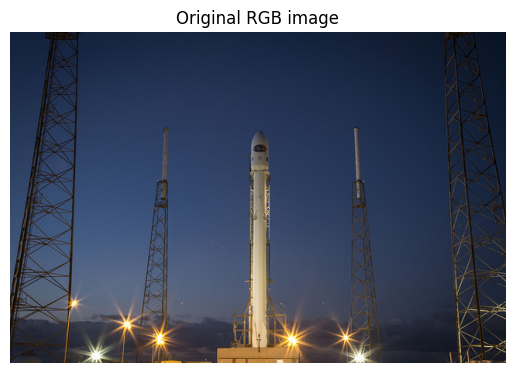

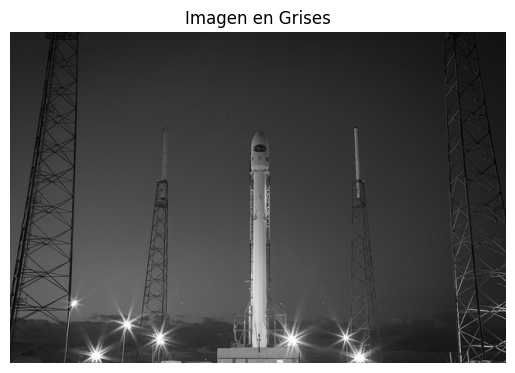

In [31]:
from skimage import data, color

# Cargar imagen de cohete
rocket = data.rocket()

# Convetir a grises
gray_scaled_rocket = color.rgb2gray(rocket)

# Mostrar imagen orignal
show_image(rocket, 'Original RGB image');

# Mostrar imagen en grises
show_image(gray_scaled_rocket, 'Imagen en Grises')

#NumPy para imagenes

### Volteando imagenes
¡Como broma, alguien volteó una imagen de un álbum de fotos de un viaje a Sevilla! Ahora, necesitamos enderezar la imagen volteándola.
![seville](dataset/sevilleup.jpg)
Usando los métodos de NumPy aprendidos en el curso, voltea la imagen horizontal y verticalmente. Luego, muestra la imagen corregida con la función `show_image()`.